In [1]:
#import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from numpy.linalg import inv
import matplotlib.ticker as ticker
from matplotlib.ticker import MaxNLocator
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
import matplotlib.colors as colors
from matplotlib import rc
plt.rcParams["font.serif"]       = 'Times New Roman'
plt.rcParams["xtick.major.size"] = 10
plt.rcParams["ytick.major.size"] = 10
plt.rcParams["xtick.minor.size"] = 5
plt.rcParams["ytick.minor.size"] = 5
plt.rcParams["xtick.labelsize"]  = 25
plt.rcParams["ytick.labelsize"]  = 25

plt.rcParams["legend.title_fontsize"]=25
import sys

In [2]:
class PerfTime:
    def __init__(self, num_gpu, num_cells, cpu_recursion, cpu_other, gpu_pFor, gpu_other, total):
        self.num_gpu = num_gpu
        self.num_cells = num_cells
        self.cpu_recursion = cpu_recursion
        self.cpu_other = cpu_other
        self.gpu_pFor = gpu_pFor
        self.gpu_other = gpu_other
        self.total = total

#cpu_recursion, cpu_other, gpu_pFor, gpu_other these times are divided by total time.

#        def myfunc(self):
#            print("Hello my name is " + self.name)

In [23]:
perf = []
perf.append(PerfTime(64,     64000, 0.02657871121,  0.1297149406, 0.0001210751222, 0.8435852731, 0.06098693))
#perf.append(PerfTime(256,   256000, 0.02190179025,  0.2361528071, 2.673726459e-05, 0.7419186654, 0.277290894))
perf.append(PerfTime(256,   256000, 0.02237119852,  0.2058238407, 2.590507611e-05, 0.7717790557, 0.267630945))

#perf.append(PerfTime(512,   512000, 0.02478088381,  0.1227038697, 1.523904872e-05, 0.8525000075, 0.483888472))
perf.append(PerfTime(512,   512000, 0.02294541612,  0.1886379249, 1.313943911e-05,  0.7884035195, 0.521559554))
perf.append(PerfTime(1024, 1024000, 0.02146462006,  0.2326824755, 6.290513882e-06,  0.745846614, 1.121371025))




In [24]:
nGPUs_lst=[]
for i in range(0, len(perf)):
    nGPUs_lst.append(perf[i].num_gpu)
nGPUs = np.asarray(nGPUs_lst)
print(nGPUs)

[  64  256  512 1024]


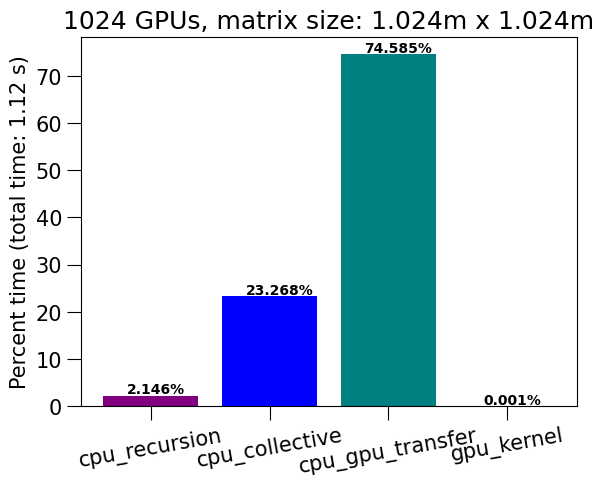

In [25]:
percent_time = []
index = 3 #1024 GPUs
percent_time = [perf[index].cpu_recursion,
                perf[index].cpu_other,
                perf[index].gpu_other,
                perf[index].gpu_pFor]
percent_time = np.asarray(percent_time)

fig, ax = plt.subplots()
n_GPUs_str = ['cpu_recursion', 'cpu_collective', 'cpu_gpu_transfer','gpu_kernel']

colors = ['purple', 'blue',  'teal', 'green']
ax.bar(n_GPUs_str,percent_time*100, color=colors)
ax.set_title('1024 GPUs, matrix size: 1.024m x 1.024m', fontsize=18)
#ax.set_yscale('log')
plt.xticks(rotation=10)
ax.tick_params(axis='both', which='major', labelsize=15)
#ax.set_xlabel('Country', fontsize=10)
ax.set_ylabel('Percent time (total time: 1.12 s)', fontsize=15)
for i, v in enumerate(percent_time*100):
    ax.text(i-0.2, v+0.5, "%.3f%%"%(v),
            color = 'k', fontweight = 'bold')
#plt.grid(True)
plt.savefig('Chart_1024gpu.png', bbox_inches = "tight")#

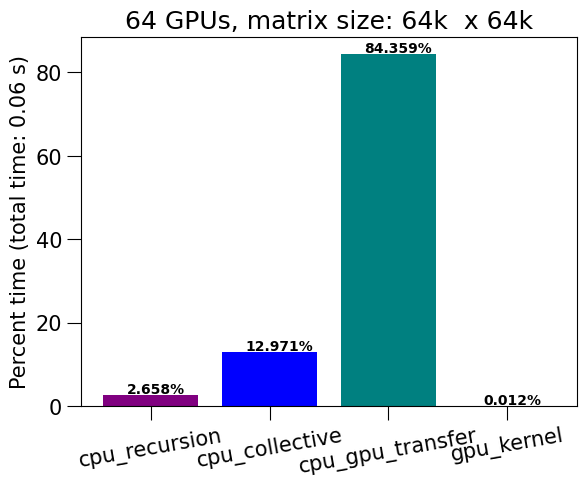

In [26]:
index = 0 #64 GPUs
percent_time = [perf[index].cpu_recursion,
                perf[index].cpu_other,
                perf[index].gpu_other,
                perf[index].gpu_pFor]
percent_time = np.asarray(percent_time)

fig, ax = plt.subplots()
n_GPUs_str = ['cpu_recursion', 'cpu_collective', 'cpu_gpu_transfer','gpu_kernel']

colors = ['purple', 'blue',  'teal', 'green']
ax.bar(n_GPUs_str,percent_time*100, color=colors)
ax.set_title('64 GPUs, matrix size: 64k  x 64k', fontsize=18)
#ax.set_yscale('log')
plt.xticks(rotation=10)
ax.tick_params(axis='both', which='major', labelsize=15)
#ax.set_xlabel('Country', fontsize=10)
ax.set_ylabel('Percent time (total time: 0.06 s)', fontsize=15)
for i, v in enumerate(percent_time*100):
    ax.text(i-0.2, v+0.5, "%.3f%%"%(v),
            color = 'k', fontweight = 'bold')
#plt.grid(True)
plt.savefig('Chart_64gpu.png', bbox_inches = "tight")#

In [27]:
wse_cpu_lst=[]
wse_gpu_lst=[]
wse_cpugpu_lst=[]
baseline_gpu_time = (perf[0].gpu_other+perf[0].gpu_pFor)*perf[0].total

baseline_cpu_time = (perf[0].cpu_other+perf[0].cpu_recursion)*perf[0].total
baseline_total_time = perf[0].total

for i in range(0, len(perf)):
    ngpu_ratio = perf[i].num_gpu/perf[0].num_gpu

    current_cpu_time = (perf[i].cpu_other+perf[i].cpu_recursion)*perf[i].total 
    current_gpu_time = (perf[i].gpu_other+perf[i].gpu_pFor)*perf[i].total 
    current_total_time = perf[i].total
    wse_cpu = (baseline_cpu_time)/(current_cpu_time)
    wse_gpu = (baseline_gpu_time*ngpu_ratio)/(current_gpu_time)
    wse_total = (baseline_total_time*ngpu_ratio)/(current_total_time)
    
    wse_cpu_lst.append(wse_cpu)
    wse_gpu_lst.append(wse_gpu)
    wse_cpugpu_lst.append(wse_total)
    
wse_cpu = np.asarray(wse_cpu_lst)
wse_gpu = np.asarray(wse_gpu_lst)
wse_cpugpu = np.asarray(wse_cpugpu_lst)

print(wse_cpu)
print(wse_gpu)
print(wse_cpugpu)

[1.         0.15607581 0.08637593 0.03344596]
[1.         0.99642402 1.00105601 0.98434096]
[1.         0.9115079  0.9354549  0.87017665]


/tmp/ipykernel_229529/586906755.py:8: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim(0,1200)


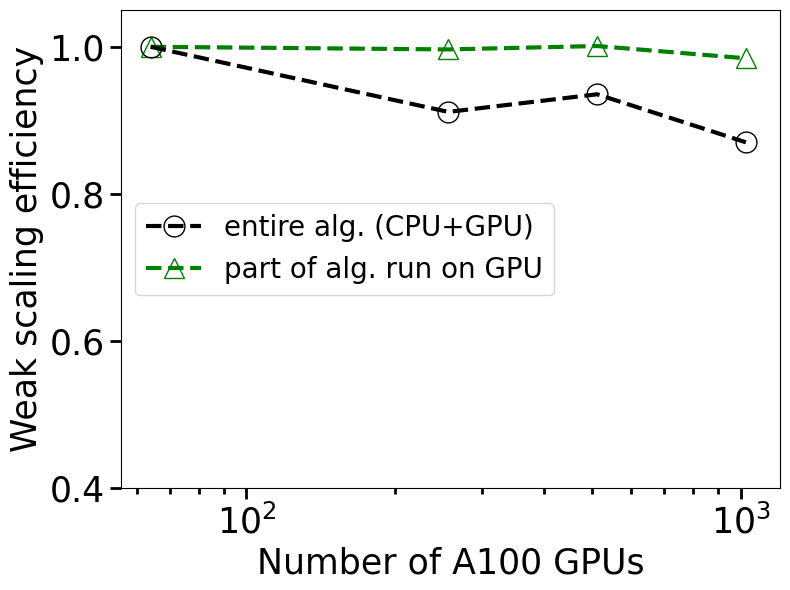

In [42]:
fig, ax = plt.subplots(1,1)
fig.set_size_inches(8,6)
fig.patch.set_facecolor('white')
p2 = ax.plot(nGPUs, wse_gpu,'g--', linewidth=3,marker='^',markersize=15,fillstyle='none', label='part of alg. run on GPU')
p1 = ax.plot(nGPUs, wse_cpugpu,'k--', linewidth=3,marker='o',markersize=15,fillstyle='none', label='entire alg. (CPU+GPU)')
ax.set_xscale('log')

ax.set_xlim(0,1200)
ax.set_ylim(0.4,1.05)

ax.set_ylabel(r'Weak scaling efficiency', fontsize=25)
ax.set_xlabel(r'Number of A100 GPUs', fontsize=25)

#ax2 = ax.twinx() 
#ax2.set_ylim(0,40)
#ax2.set_ylabel(r'Number of cells (billion)', fontsize=25)

#p2=ax2.plot(nGPUs, ncells,'r-.', linewidth=3,marker='^',markersize=15,fillstyle='none',label='number of cells')

lns = p1+p2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc='center left',prop={'size': 20})

ax.tick_params(which='minor', width=2, length=4, color='k')
ax.tick_params(which='major', width=2, length=8, color='k')
#ax2.tick_params(which='minor', width=2, length=4, color='k')
#ax2.tick_params(which='major', width=2, length=8, color='k')
#ax2.yaxis.set_minor_locator(ticker.AutoMinorLocator())
#ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())

fig.tight_layout()
plt.savefig('WSE_MatInv.png', bbox_inches = "tight")#